In [17]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import norm
#%matplotlib notebook

In [18]:
def r_on_n(n, nu, b):
    return 2*nu*n+b

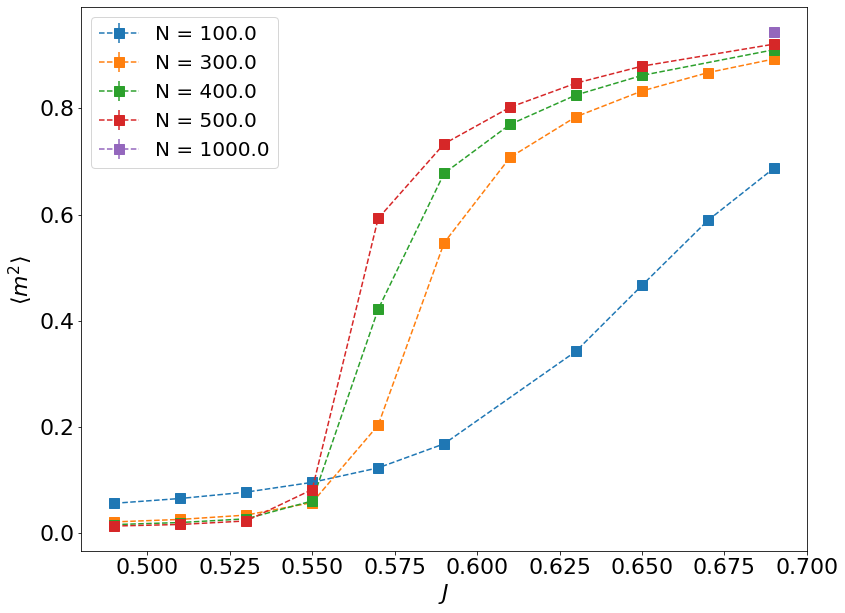

In [27]:
data_np = np.loadtxt("Ising_3D/test1/longnear.txt", skiprows=0)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    #if (l<250):
        #continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = data_l[:,15]
    errs = data_l[:,16]
    #errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    #errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle m^2 \rangle $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

#plt.grid()

plt.legend(loc="best", fontsize=20)
 
#ax2 = ax.twiny() 
#ax2.set_xlabel(r'$x$', fontsize=22)
#ax2.set_xticks(np.arange(0,11,2)/10)
#ax2.tick_params(axis='x', labelsize=22)
#ax2.set_xbound(ax.get_xbound())
#ax2.set_xticklabels( np.round( np.exp(np.arange(0, 11, 2)/10), 1) )

#plt.savefig("/home/kamilla/Lattice_models/img/mag2.png")


#plt.savefig("/home/kamilla/Lattice_models/Seminar_24_02_2020/mag2.png")

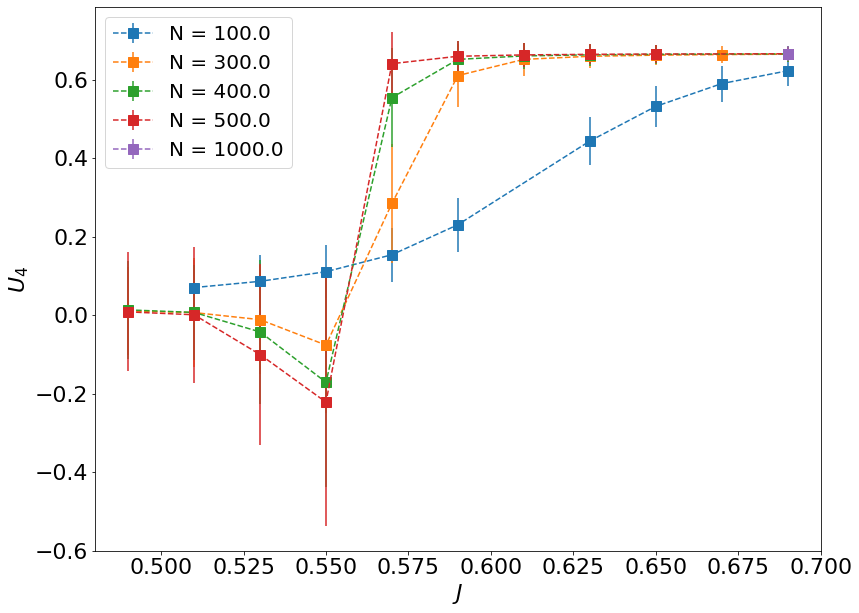

In [26]:
data_np = np.loadtxt("Ising_3D/test1/longnear.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]
    errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.8)



plt.legend(loc="best", fontsize=20)
 

/home/kamilla/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


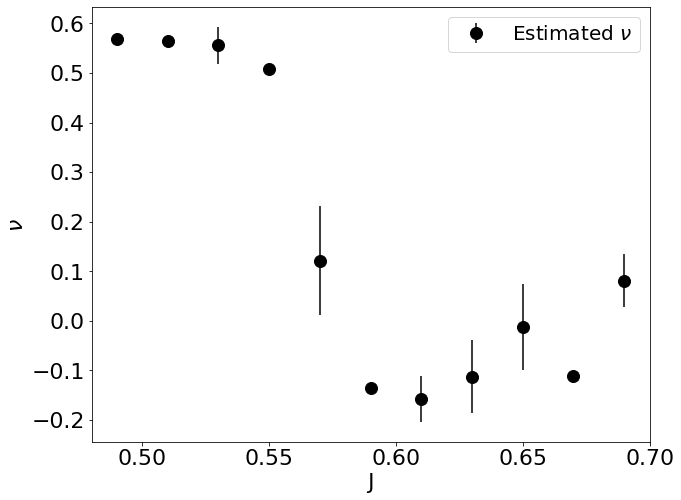

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Ising_3D/test1/longnear.txt", skiprows=0)
#data_np = np.loadtxt("Ising/Canonical_near_phase/longnear.txt", skiprows=1)

J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l :
    data_l = data_np[data_np[:,1]==J]
    
    data_l = data_l[data_l[:,0]>99]
    
    #if (len(data_l)>0):
        #continue
    #print(data_l)
    n_saw = data_l[:, 0]
    mean_r = data_l[:,3]
    err_r = data_l[:,4] 
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    
    
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


#plt.plot([J_l[0], J_l[-1]], [4/7, 4/7], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))


plt.legend(loc="best", fontsize=20)

In [6]:
data_np[:, 3]

array([1.02150e+02, 9.25552e+02, 1.30207e+03, 1.69315e+03, 2.41608e+02,
       8.80187e+02, 1.23038e+03, 1.59444e+03, 1.31422e+02, 8.17294e+02,
       1.13906e+03, 1.48285e+03, 2.10169e+02, 7.11050e+02, 8.29699e+02,
       1.23255e+03, 1.33225e+01, 5.00000e+00, 6.99986e+00, 9.00000e+00,
       1.00000e+00, 1.40000e+01, 5.40000e+01, 8.03604e+01, 1.00000e+00,
       1.70000e+01, 2.10000e+01, 6.40263e+01, 2.70000e+01, 4.84299e+01,
       1.80000e+01, 5.70313e+01, 7.18184e+00, 5.00000e+00, 1.00000e+00,
       3.91738e+01, 4.77104e+01, 2.39042e+01, 4.49560e+01, 2.49073e+01,
       2.42218e+01, 3.52376e+01, 4.07264e+01, 6.82293e+01, 8.37143e+01,
       2.00000e+00, 3.39275e+01, 3.93581e+01, 4.75016e+01])

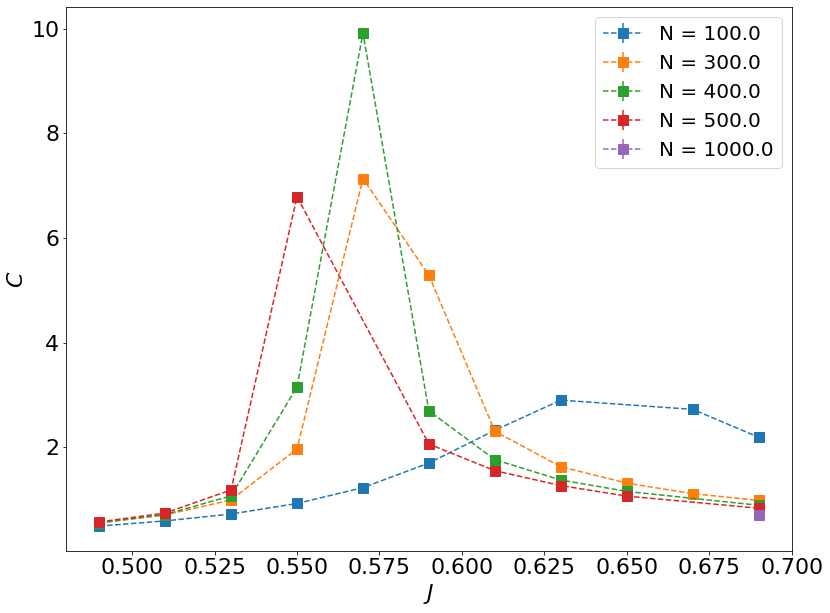

In [24]:
data_np = np.loadtxt("Ising_3D/test1/longnear.txt", skiprows=0)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 0.835
 
 
gamma = 9/3.5
nu= 3.5
power = -gamma/nu


 
for l in lengths:
    
    #if (l<250):
        #continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    #m2 = data_l[:,17]/J_l
    
    
    m2 = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(J_l)*l
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2 
    
    errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]
    #errs = data_l[:,16]*y

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l, y, yerr=errs*np.square(J_l)*l, fmt="s--", ms = 10, label = "N = " + str(l))
    #plt.errorbar(J_l, y, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)


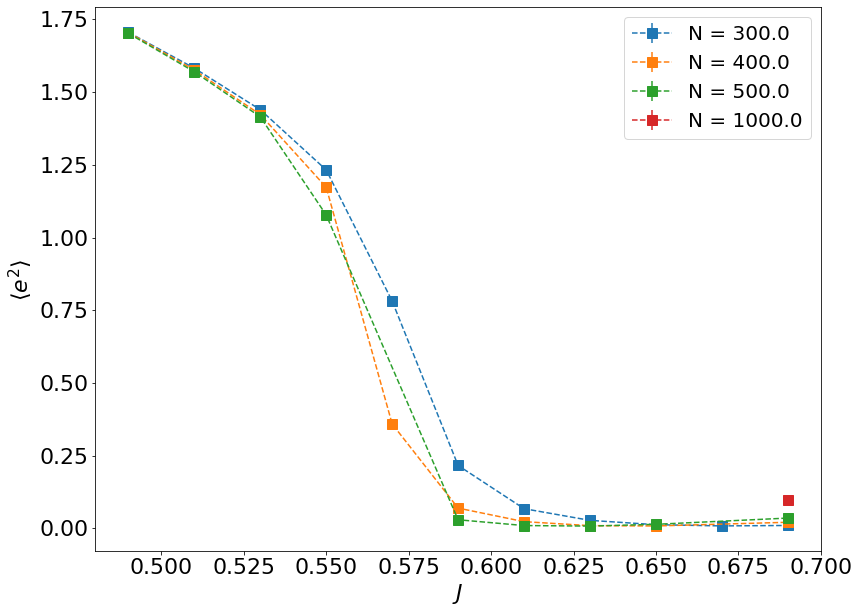

In [25]:
data_np = np.loadtxt("Ising_3D/test1/longnear.txt", skiprows=0)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if (l<250):
        continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = data_l[:,9]
    errs = data_l[:,10]
    #errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    #errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle e^2 \rangle $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

#plt.grid()

plt.legend(loc="best", fontsize=20)